**Play Multi-Armed Bandit with Epsilon-Greedy strategy**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#Bandit class

class Bandit:
    def __init__(self,p):
        #p: the win rate
        self.p = p
        self.p_estimate = 0.
        self.N = 0.
        
    def pull(self):
        #draw a 1 with probability p
        return np.random.random() < self.p
    
    def update(self,x):
        self.N += 1
        N = self.N
        self.p_estimate = x/N + (N-1)/N * self.p_estimate

In [20]:
#experiment

NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    for i in range(NUM_TRIALS):
        #use epsilon-greedy to select next bandit
        if np.random.random() < EPS:
            num_times_explored += 1
            j = np.random.randint(len(bandits))
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])
            
        if j == optimal_j:
            num_optimal += 1
            
        #pull the arm for the selected bandit 
        x = bandits[j].pull()
        
        #update the distribution
        bandits[j].update(x)
        
        #update rewards log
        rewards[i] = x
    
    # print mean estimates for each bandit
    for b in bandits:
        print("mean estimate: ", b.p_estimate)
        
    #print total reward
    print('total reward earned: ', rewards.sum())
    print('overall win rate: ', rewards.sum() / NUM_TRIALS)
    print('num_times_explored: ', num_times_explored)
    print('num_times_exploited: ', num_times_exploited)
    print('num times selected optimal bandit: ', num_optimal)
    
    #plot results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.show()

mean estimate:  0.19743589743589735
mean estimate:  0.498614958448753
mean estimate:  0.744512920315714
total reward earned:  7143.0
overall win rate:  0.7143
num_times_explored:  1049
num_times_exploited:  8951
num times selected optimal bandit:  9249


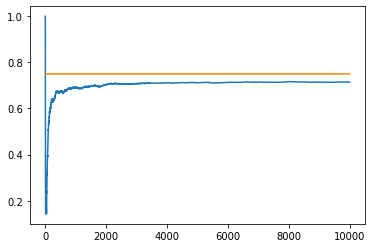

In [21]:
experiment()